<a href="https://colab.research.google.com/github/NazarKarpiuk/kerasNumbersMNIST/blob/main/kerasMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten

Load samples for training and testing


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


Data normalization

In [3]:
x_train = x_train / 255
x_test = x_test / 255

Conversion of initial values into vectors by categories

In [4]:
y_train_cat = keras.utils.to_categorical(y_train, 10) # 3 -> [0,0,0,1,0,0,0,0,0,0]
y_test_cat = keras.utils.to_categorical(y_test, 10)

Display the first 25 images from the training sample

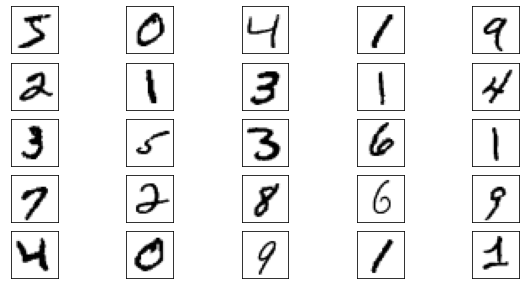

In [5]:
plt.figure(figsize=(10,5))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)

plt.show()

Create a model of a neural system and print its structure



In [6]:
model = keras.Sequential([
  Flatten(input_shape=(28,28,1)),
  Dense(128, activation='relu'),
  Dense(10, activation="softmax")                        
])

print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


Neural network compilation with Adam optimizer and criterion - categorical cross-entropy

In [7]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=['accuracy'])

Starting the learning process: 80% - training sample, 20% - validation sample

In [8]:
fir_results = model.fit(x_train, y_train_cat, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4761 - accuracy: 0.8656 - val_loss: 0.1592 - val_accuracy: 0.9568
Epoch 2/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1351 - accuracy: 0.9613 - val_loss: 0.1220 - val_accuracy: 0.9643
Epoch 3/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0908 - accuracy: 0.9734 - val_loss: 0.1014 - val_accuracy: 0.9705
Epoch 4/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0648 - accuracy: 0.9813 - val_loss: 0.0949 - val_accuracy: 0.9718
Epoch 5/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0497 - accuracy: 0.9851 - val_loss: 0.0970 - val_accuracy: 0.9704
Epoch 6/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0370 - accuracy: 0.9884 - val_loss: 0.0879 - val_accuracy: 0.9737
Epoch 7/20
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0267 - accuracy: 0.9927 - val_loss: 0.0881 - val_accuracy:

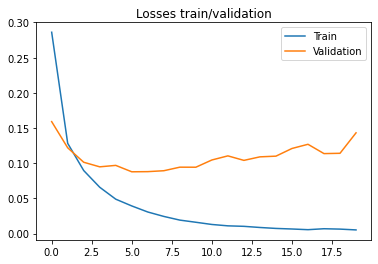

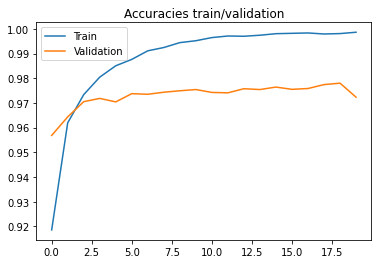

In [9]:
plt.title("Losses train/validation")
plt.plot(fir_results.history["loss"], label="Train")
plt.plot(fir_results.history["val_loss"], label="Validation")
plt.legend()
plt.show()

plt.title("Accuracies train/validation")
plt.plot(fir_results.history["accuracy"], label="Train")
plt.plot(fir_results.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

In [10]:
model.evaluate(x_test, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.1274 - accuracy: 0.9745


[0.1273626685142517, 0.9745000004768372]

Check the number recognition

[[2.16183201e-19 6.13393742e-27 3.67542651e-17 2.34166329e-21
  1.04369256e-26 2.29166563e-19 1.00000000e+00 1.26775239e-19
  9.72360019e-21 6.06220680e-31]]
Recognized number: 6


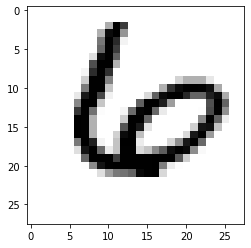

In [11]:
n = 1332
x = np.expand_dims(x_test[n], axis=0)
res = model.predict(x)
print(res)
print(f"Recognized number: {np.argmax(res)}")

plt.imshow(x_test[n], cmap=plt.cm.binary)
plt.show()

Recognition of incorrect results

In [12]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

print(pred.shape)

print(pred[:20])
print(y_test[:20])

(10000,)
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
[7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


Mask creation

In [13]:
mask = pred == y_test
print(mask[:10])

x_false = x_test[~mask]
p_false = pred[~mask]

print(x_false.shape)


[ True  True  True  True  True  True  True  True  True  True]
(255, 28, 28)


Output the first incorrect images

Network value: 5


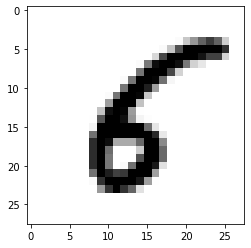

Network value: 2


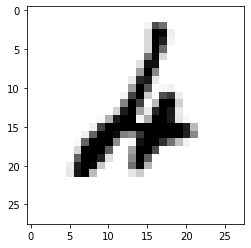

Network value: 3


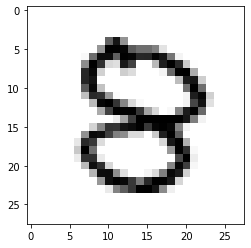

Network value: 5


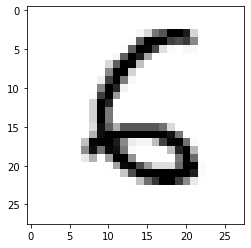

Network value: 3


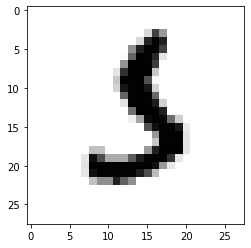

In [14]:
for i in range(5):
  print("Network value: "+str(p_false[i]))
  plt.imshow(x_false[i], cmap=plt.cm.binary)
  plt.show()